In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#this generates a random array of 100 numbers, the random seed is so that I am returned the same values everytime
#this is to ensure consistency throughout the models
np.random.seed(42)
x = np.random.rand(100)
print(x)

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184
 0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
 0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735
 0.30461377 0.09767211 0.68423303 0.44015249 0.12203823 0.49517691
 0.03438852 0.9093204  0.25877998 0.66252228 0.31171108 0.52006802
 0.54671028 0.18485446 0.96958463 0.77513282 0.93949894 0.89482735
 0.59789998 0.92187424 0.0884925  0.19598286 0.04522729 0.32533033
 0.38867729 0.27134903 0.82873751 0.35675333 0.28093451 0.54269608
 0.14092422 0.80219698 0.07455064 0.98688694 0.77224477 0.19871568
 0.00552212 0.81546143 0.70685734 0.72900717 0.77127035 0.07404465
 0.35846573 0.11586906 0.86310343 0.62329813 0.33089802 0.06355835
 0.31098232 0.32518332 0.72960618 0.63755747 0.88721274 0.4722

In [2]:
#this calculates the original y values by using gaussian noise
y = x + np.random.normal(0, 0.1, size=len(x))
print(y)

[ 0.38324483  0.92081357  0.74117002  0.39990159  0.13405145  0.19170578
  0.20587302  0.81434912  0.52026565  0.65789687  0.11212471  1.00278496
  0.77946662  0.26366585  0.19153272  0.28026901  0.23403693  0.49199022
  0.3927342   0.14487765  0.64146492  0.16559939  0.29265599  0.34290313
  0.31453291  0.74311143  0.16540233  0.43400671  0.576286    0.0868555
  0.79616344  0.1879819   0.09080663  0.94144095  0.77375491  0.80574596
  0.31063679  0.34399633  0.66499693  0.47030723  0.11856706  0.37830911
  0.1486708   0.98451371  0.33788318  0.57158354  0.45199051  0.37988291
  0.60539599  0.40390002  0.870531    0.71850305  0.94946408  0.84447979
  0.44283364  0.92873053 -0.01773787  0.24334211 -0.04671513  0.48032377
  0.31035196  0.23914288  0.91008923  0.2336669   0.3036805   0.67341036
 -0.0198241   0.82066037  0.10053892  1.06506922  0.6485497   0.06667002
  0.05771627  0.8451599   0.73190663  0.76365199  0.70326787  0.09727002
  0.38777298  0.04443392  1.04968088  0.67068142  0.

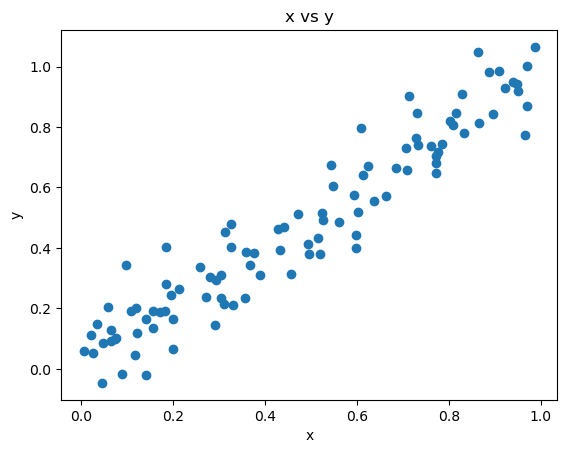

In [3]:
#this is a scatterplot to show the relationship between x and y
plt.scatter(x,y)
plt.title('x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
#this is just a dataframe that combines both the x and y arrays into a concise dataset
data = pd.DataFrame({'x': x, 'y': y})
data

,x,y
0,0.374540,0.383245
1,0.950714,0.920814
2,0.731994,0.741170
3,0.598658,0.399902
4,0.156019,0.134051
...,...,...
95,0.493796,0.412215
96,0.522733,0.515023
97,0.427541,0.461656
98,0.025419,0.053088


In [5]:
#I saved the dataframe to a csv file for further use in Weka
data.to_csv('lin_regdata.csv', index=False)

In [121]:
from sklearn.model_selection import train_test_split

#here I split the dataset into a training, validation, and test sets
train_split = 0.7
valid_split = 0.1
test_split = 0.2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1 - train_split)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = test_split/(test_split+valid_split))

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(69,) (69,)
(10,) (10,)
(21,) (21,)


In [122]:
#dataframe for training set
train_data = pd.DataFrame({'x': x_train, 'y': y_train})
train_data

,x,y
0,0.181825,0.191533
1,0.212339,0.263666
2,0.524756,0.491990
3,0.325330,0.480324
4,0.074551,0.100539
...,...,...
64,0.058084,0.205873
65,0.304242,0.234037
66,0.195983,0.243342
67,0.815461,0.845160


In [123]:
#dataframe for validation set
valid_data = pd.DataFrame({'x': x_valid, 'y': y_valid})
valid_data

,x,y
0,0.520068,0.379883
1,0.921874,0.928731
2,0.356753,0.233667
3,0.708073,0.657897
4,0.948886,0.941441
5,0.939499,0.949464
6,0.887213,0.983550
7,0.969910,1.002785
8,0.775133,0.718503
9,0.969585,0.870531


In [124]:
#dataframe for test set
test_data = pd.DataFrame({'x': x_test, 'y': y_test})
test_data

,x,y
0,0.025419,0.053088
1,0.713245,0.902924
2,0.198716,0.066670
3,0.771270,0.703268
4,0.088493,-0.017738
5,0.311711,0.451991
6,0.358466,0.387773
7,0.325183,0.403892
8,0.366362,0.342903
9,0.139494,0.165599


In [125]:
#since we already have our values for x and y, for all sets, we do not need to calculate for that
#however, we still need to find m(slope) and b(intercept). Thus, I will be using the least squares calculation
def lin_regress(instance, output):
    input_mean = np.mean(instance)
    output_mean = np.mean(output)
    least_squares_num = (instance - input_mean) * (output-output_mean)
    least_squares_den = (instance - input_mean) ** 2
    m = least_squares_num / least_squares_den
    b = output - (m*input_mean)
    m, b = np.polyfit(instance, output, 1)
    return m, b

#this function will use the instances(x) from the dataset, then calculate the prediction(y) based on the calculated m and b
def predictor_function(instance, m, b):
    return (m * instance) + b

m, b = lin_regress(x_train, y_train)

print('m is:', m)
print('b is:', b)

m is: 0.9350285780438998
b is: 0.03427977514827748


In [126]:
#this is caluclations for the validation set predictions
#this helps in testing the accuracy of the model
validation_predictions = predictor_function(x_valid, m, b)
validation_predictions

array([0.52055824, 0.89625853, 0.36785433, 0.69634787, 0.92151487,
       0.91273813, 0.86384904, 0.94117321, 0.75905112, 0.94086911])

In [127]:
#this prints out the actual values and compares it to the predictions using the validation set
print("Actual vs Validations Predictions:")
for actual, predicted in zip(y_test, validation_predictions):
    print(f"Actual: {actual}, Predicted: {predicted}")

Actual vs Validations Predictions:
Actual: 0.0530882066770971, Predicted: 0.5205582374762707
Actual: 0.9029240854883898, Predicted: 0.8962585302572503
Actual: 0.06667002022574478, Predicted: 0.3678543309190151
Actual: 0.7032678745280967, Predicted: 0.6963478707167926
Actual: -0.01773786932069099, Predicted: 0.9215148697726836
Actual: 0.4519905071830209, Predicted: 0.9127381345527902
Actual: 0.3877729758741407, Predicted: 0.8638490442618486
Actual: 0.40389178240099227, Predicted: 0.9411732050460762
Actual: 0.342903129956177, Predicted: 0.7590511167707739
Actual: 0.16559938787003076, Predicted: 0.9408691109401967


In [128]:
#these functions calculate the errors and residuals between the actual and prediction values
#this helps show how accurate the model is
def mean_squared_error(actual, prediction):
    mse = ((actual - prediction)**2) / len(actual)
    return mse
def mean_absolute_error(actual, prediction):
    mae = (actual - prediction) / len(actual)
    return abs(mae)
def r_squared(actual, prediction):
    actual_mean = sum(actual) / len(actual)
    total_sum_squares = sum((actual - actual_mean) ** 2)
    residual_sum_squares = sum((actual - prediction) ** 2)
    r_2 = 1 - (residual_sum_squares / total_sum_squares)
    return r_2
def root_mean_squared_error(meansquareerror):
    rmse = np.sqrt(meansquareerror)
    return rmse

In [129]:
#these are the errors and residuals of the validation predictions
mse_valid = mean_squared_error(y_valid, validation_predictions).sum()
mae_valid = mean_absolute_error(y_valid, validation_predictions).sum()
r2_valid = r_squared(y_valid, validation_predictions).sum()
rmse_valid = root_mean_squared_error(mse_valid)

print("Mean Squared Error:", mse_valid)
print("Mean Absolute Error:", mae_valid)
print("R-squared:", r2_valid)
print('Root Mean Squared Error:', rmse_valid)

Mean Squared Error: 0.006679057672865896
Mean Absolute Error: 0.06946370287758155
R-squared: 0.8975046344665869
Root Mean Squared Error: 0.08172550197377741


In [130]:
#this calculates the predictions for the test set
test_predictions = predictor_function(x_test, m, b)

print(test_predictions)

[0.05804739 0.70118403 0.22008462 0.75543959 0.11702279 0.32573854
 0.36945548 0.33833547 0.37683857 0.16471052 0.30744337 0.92322482
 0.75515612 0.76844174 0.59333334 0.14262066 0.49599277 0.14610381
 0.07771224 0.7164824  0.74563554]


In [131]:
#prints actual vs prediction for test predictions
print("Actual vs Predicted:")
for actual, predicted in zip(y_test, test_predictions):
    print(f"Actual: {actual}, Predicted: {predicted}")

Actual vs Predicted:
Actual: 0.0530882066770971, Predicted: 0.058047385082926464
Actual: 0.9029240854883898, Predicted: 0.7011840343426184
Actual: 0.06667002022574478, Predicted: 0.22008461628819914
Actual: 0.7032678745280967, Predicted: 0.755439590697463
Actual: -0.01773786932069099, Predicted: 0.11702279350943065
Actual: 0.4519905071830209, Predicted: 0.32573853938469327
Actual: 0.3877729758741407, Predicted: 0.36945547558649927
Actual: 0.40389178240099227, Predicted: 0.3383354743465383
Actual: 0.342903129956177, Predicted: 0.3768385685327201
Actual: 0.16559938787003076, Predicted: 0.16471052131961006
Actual: 0.29265599419946425, Predicted: 0.3074433704512974
Actual: 0.9208135713633294, Predicted: 0.9232248211967339
Actual: 0.6820157369920087, Predicted: 0.7551561211397061
Actual: 0.7431114291164777, Predicted: 0.768441737843839
Actual: 0.4428336357044719, Predicted: 0.5933333421484843
Actual: 0.04443391772249293, Predicted: 0.1426206571153435
Actual: 0.41221456786784694, Predicted: 

In [132]:
#these are the errors and residuals of the test set predictions
mse_test = mean_squared_error(y_test, test_predictions).sum()
mae_test = mean_absolute_error(y_test, test_predictions).sum()
r2_test = r_squared(y_test, test_predictions).sum()
rmse_test = root_mean_squared_error(mse_test)

print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared:", r2_test)
print('Root Mean Squared Error:', rmse_test)

Mean Squared Error: 0.008204899351510104
Mean Absolute Error: 0.06873059977147977
R-squared: 0.907301927415754
Root Mean Squared Error: 0.09058089948499133


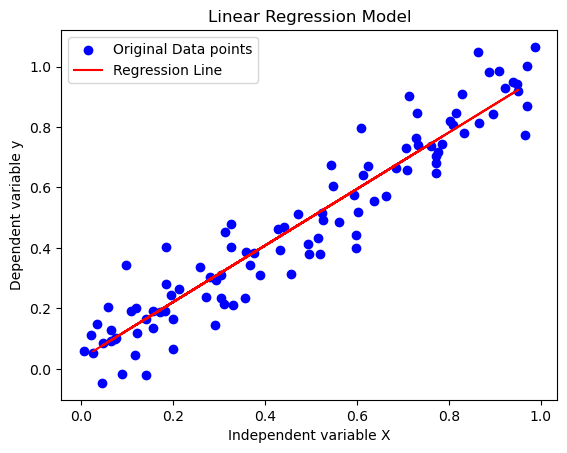

In [133]:
#this plots the original data points vs the new regression line with the test set predictions

plt.scatter(x, y, color='blue', label='Original Data points')
plt.plot(x_test, test_predictions, color='red', label='Regression Line')
plt.xlabel('Independent variable X')
plt.ylabel('Dependent variable y')
plt.title('Linear Regression Model')
plt.legend()
plt.show()


In [134]:
#here, I created a completely new linear regression and prediction function to handle iterations, and gradient descent
#the one above did not use iterations
def newlin_regress(instance, output, iterations, learning_rate=0.01):
    #here, I initalized the slope and intercept to 0
    #also made list to store gradient values after each iteration
    gradients_m = []  
    gradients_b = []
    
    nm = 0
    nb = 0
    
    #to go through the iterations, I made a for loop
    #each time an iteration is going through the loop, updates are made to the parameters
    for _ in range(iterations):
        predictions = (nm * instance) + nb
        error = predictions - output
        
        #updates the parameters based on the mean squared error derivative
        dm = (2/len(instance)) * np.sum(error * instance)
        db = (2/len(instance)) * np.sum(error)
        
        #updates m, b, and also gradient lists for m and b
        
        nm -= learning_rate * dm
        nb -= learning_rate * db
        gradients_m.append(dm)
        gradients_b.append(db)
        print(nm, nb)
    
    return nm, nb, gradients_m, gradients_b

def newpredictor_function(instance, nm, nb):
    return (nm * instance) + nb


nm, nb, gm, gb = newlin_regress(x_train, y_train, 10000)
print('m is:', nm)
print('b is:', nb)

0.005309520674810212 0.008832464476748651
0.010513630559195648 0.017442018009220434
0.015614836767009421 0.02583403725656911
0.020615586129787023 0.03401376950037628
0.02551826664706274 0.0419863357574404
0.030325208901792217 0.049756733817673475
0.0350386874417206 0.05732984120890727
0.039660922127515714 0.06471041809036764
0.04419407944846574 0.07190311007653306
0.04864027380652195 0.07891245099305244
0.05300156876944795 0.08574286556635671
0.05727997829381882 0.09239867204855957
0.06147746791859547 0.09888408477920424
0.06559595592998224 0.10520321668537573
0.06963731449825858 0.11136008172166152
0.07360337078725913 0.11735859725140785
0.07749590803716032 0.12320258637068396
0.08131666662121562 0.12889578017633285
0.08506734507706627 0.13444181997945373
0.08874960111323932 0.13984425946562898
0.09236505259142963 0.145106566803177
0.09591527848514889 0.15023212670068148
0.09940181981530986 0.15522424241501742
0.1028261805633011 0.1600861377110648
0.10618982856209343 0.164820958774272

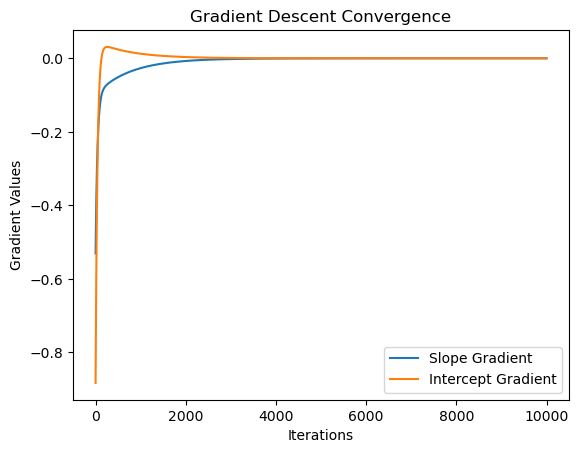

In [135]:
#this will show plot for 100 iterations, thus 100 gradient values for each m and b
#later in the code, I go through several different iteration numbers. this
#from the returned values in the last cell, you can see the steady growth of the gradient values as each iteration goes by
plt.plot(range(10000), gm, label='Slope Gradient') 
plt.plot(range(10000), gb, label='Intercept Gradient')
plt.xlabel("Iterations")
plt.ylabel("Gradient Values") 
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()

In [136]:
#this will give the new validation predictions with gradient descent function
newvalidation_predictions = newpredictor_function(x_valid, nm, nb)
newvalidation_predictions

array([0.52055815, 0.89625775, 0.36785452, 0.69634746, 0.92151405,
       0.91273733, 0.86384833, 0.94117235, 0.75905059, 0.94086825])

In [137]:
#prints out actual vs new validation predictions 
print("Actual vs Predicted:")
for actual, predicted in zip(y_test, newvalidation_predictions):
    print(f"Actual: {actual}, Predicted: {predicted}")

Actual vs Predicted:
Actual: 0.0530882066770971, Predicted: 0.5205581453511886
Actual: 0.9029240854883898, Predicted: 0.8962577545069838
Actual: 0.06667002022574478, Predicted: 0.3678545166543401
Actual: 0.7032678745280967, Predicted: 0.6963474587244578
Actual: -0.01773786932069099, Predicted: 0.921514048065919
Actual: 0.4519905071830209, Predicted: 0.9127373288161947
Actual: 0.3877729758741407, Predicted: 0.8638483274839631
Actual: 0.40389178240099227, Predicted: 0.9411723475689558
Actual: 0.342903129956177, Predicted: 0.759050590683457
Actual: 0.16559938787003076, Predicted: 0.9408682540164067


In [138]:
#error and residual scores for new validation predictions
new_mse_valid = mean_squared_error(y_valid, newvalidation_predictions).sum()
new_mae_valid = mean_absolute_error(y_valid, newvalidation_predictions).sum()
new_r2_valid = r_squared(y_valid, newvalidation_predictions).sum()
new_rmse_valid = root_mean_squared_error(new_mse_valid)

print("Mean Squared Error:", new_mse_valid)
print("Mean Absolute Error:", new_mae_valid)
print("R-squared:", new_r2_valid)
print('Root Mean Squared Error:', new_rmse_valid)

Mean Squared Error: 0.006679082533464846
Mean Absolute Error: 0.06946393048312494
R-squared: 0.8975042529612456
Root Mean Squared Error: 0.08172565407180811


In [139]:
#this will give the new test set predictions with gradient descent function
newtest_predictions = newpredictor_function(x_test, nm, nb)

print(newtest_predictions)

[0.05804813 0.70118361 0.22008507 0.75543907 0.11702344 0.3257388
 0.36945566 0.33833571 0.37683874 0.16471108 0.30744367 0.923224
 0.7551556  0.76844119 0.59333312 0.14262125 0.49599272 0.1461044
 0.07771295 0.71648195 0.74563504]


In [140]:
#prints out actual vs new test set predictions 
print("Actual vs Predicted:")
for actual, predicted in zip(y_test, newtest_predictions):
    print(f"Actual: {actual}, Predicted: {predicted}")

Actual vs Predicted:
Actual: 0.0530882066770971, Predicted: 0.058048134543738375
Actual: 0.9029240854883898, Predicted: 0.7011836135503883
Actual: 0.06667002022574478, Predicted: 0.22008507090566332
Actual: 0.7032678745280967, Predicted: 0.755439071181688
Actual: -0.01773786932069099, Predicted: 0.11702343565844314
Actual: 0.4519905071830209, Predicted: 0.325738801754017
Actual: 0.3877729758741407, Predicted: 0.36945565840837746
Actual: 0.40389178240099227, Predicted: 0.33833571379444793
Actual: 0.342903129956177, Predicted: 0.37683873792030403
Actual: 0.16559938787003076, Predicted: 0.16471107669591475
Actual: 0.29265599419946425, Predicted: 0.30744366611055585
Actual: 0.9208135713633294, Predicted: 0.9232239963785374
Actual: 0.6820157369920087, Predicted: 0.755155602139733
Actual: 0.7431114291164777, Predicted: 0.7684411946693248
Actual: 0.4428336357044719, Predicted: 0.5933331176016412
Actual: 0.04443391772249293, Predicted: 0.14262125268641987
Actual: 0.41221456786784694, Predicted

In [141]:
#error and residual scores for new test set predictions
newmse_test = mean_squared_error(y_test, newtest_predictions).sum()
newmae_test = mean_absolute_error(y_test, newtest_predictions).sum()
newr2_test = r_squared(y_test, newtest_predictions).sum()
newrmse_test = root_mean_squared_error(newmse_test)

print("Mean Squared Error:", newmse_test)
print("Mean Absolute Error:", newmae_test)
print("R-squared:", newr2_test)
print('Root Mean Squared Error:', newrmse_test)

Mean Squared Error: 0.008204914214089927
Mean Absolute Error: 0.06873050706586997
R-squared: 0.9073017594999218
Root Mean Squared Error: 0.09058098152531759


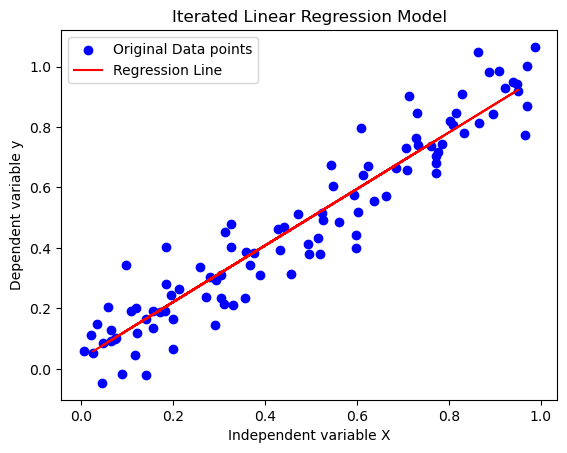

In [142]:
#plots original data points against regression line of the iterated test set predictions
plt.scatter(x, y, color='blue', label='Original Data points')
plt.plot(x_test, newtest_predictions, color='red', label='Regression Line')
plt.xlabel('Independent variable X')
plt.ylabel('Dependent variable y')
plt.title('Iterated Linear Regression Model')
plt.legend()
plt.show()

In [143]:
iterations = [50,100,1600]
gradients_m = []
gradients_b = []

for itr in iterations:

    #will calculate gradient values from the gradient descent linear regression function
    nm, nb, gm, gb = newlin_regress(x_train, y_train, itr)
    
    #stores all of the gradient values, since original list will be empty after running through regression function each time
    gradients_m.append(gm[-1]) 
    gradients_b.append(gb[-1])

0.005309520674810212 0.008832464476748651
0.010513630559195648 0.017442018009220434
0.015614836767009421 0.02583403725656911
0.020615586129787023 0.03401376950037628
0.02551826664706274 0.0419863357574404
0.030325208901792217 0.049756733817673475
0.0350386874417206 0.05732984120890727
0.039660922127515714 0.06471041809036764
0.04419407944846574 0.07190311007653306
0.04864027380652195 0.07891245099305244
0.05300156876944795 0.08574286556635671
0.05727997829381882 0.09239867204855957
0.06147746791859547 0.09888408477920424
0.06559595592998224 0.10520321668537573
0.06963731449825858 0.11136008172166152
0.07360337078725913 0.11735859725140785
0.07749590803716032 0.12320258637068396
0.08131666662121562 0.12889578017633285
0.08506734507706627 0.13444181997945373
0.08874960111323932 0.13984425946562898
0.09236505259142963 0.145106566803177
0.09591527848514889 0.15023212670068148
0.09940181981530986 0.15522424241501742
0.1028261805633011 0.1600861377110648
0.10618982856209343 0.164820958774272

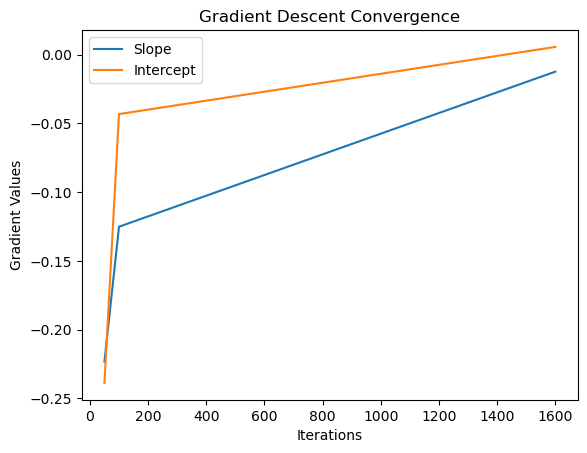

In [144]:
#this will plot the iterations vs the gradient values for the slope and intercept 
plt.plot(iterations, gradients_m, label='Slope')
plt.plot(iterations, gradients_b, label='Intercept')
plt.xlabel("Iterations")
plt.ylabel("Gradient Values") 
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()